In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_column', 30)
sns.set_style('whitegrid')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [2]:
df = pd.read_csv('fcai_db_cs251_midterm.csv')
df.head()

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade (7+1)
0,20150383,D,B,C,D,D,A,C,A,D,B,A,B,B,B,D,E,7,4.5
1,20170252,A,E,C,E,E,A,D,E,C,B,A,B,E,C,E,E,7,4.5
2,20170456,A,B,C,D,E,E,E,E,C,D,A,B,D,C,A,B,9,5.0
3,20180129,D,E,E,E,D,D,A,E,C,D,A,B,D,C,C,E,9,5.0
4,20180467,D,E,D,E,D,A,C,A,A,C,A,B,E,D,C,E,7,3.5


In [3]:
df = df.rename(columns={'finalGrade (7+1)': 'finalGrade7_1'})

### Quick look at the dataset

In [4]:
df[['score', 'finalGrade7_1']].describe().round()

,score,finalGrade7_1
count,609.0,609.0
mean,9.0,5.0
std,2.0,1.0
min,3.0,2.0
25%,7.0,4.0
50%,9.0,5.0
75%,10.0,6.0
max,15.0,8.0


There are small number of null values in some columns 

In [5]:
df.isnull().sum()

Stud_ID          0
MCQ1             1
MCQ2             0
MCQ3             0
MCQ4             1
MCQ5             0
MCQ6             1
MCQ7             1
MCQ8             1
MCQ9             0
MCQ10            1
MCQ11            1
MCQ12            0
MCQ13            0
MCQ14            0
MCQ15            0
MCQ16            1
score            0
finalGrade7_1    0
dtype: int64

There is no duplicates in the dataset

In [6]:
df[df.duplicated(keep=False)]

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1


Interesting, There's one outlier :)

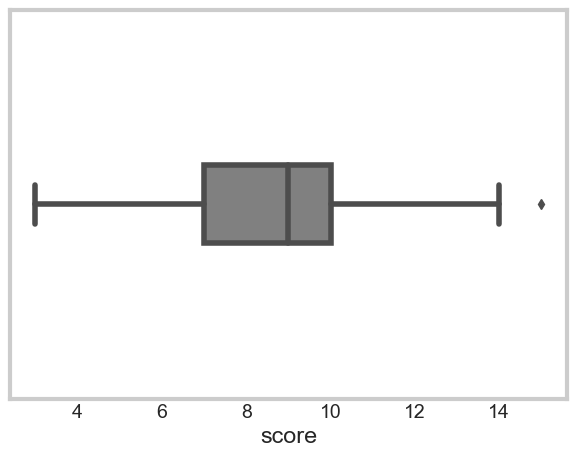

In [7]:
sns.boxplot(x=df['score'], color='gray', width=0.2)
plt.grid(False)
plt.show()

In [8]:
correct_ans = df[df['score'] > 14]
correct_ans

,Stud_ID,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16,score,finalGrade7_1
86,20210127,D,B,C,B,D,A,E,E,C,A,A,B,D,C,A,E,15,8.0


### Let's Visualize!

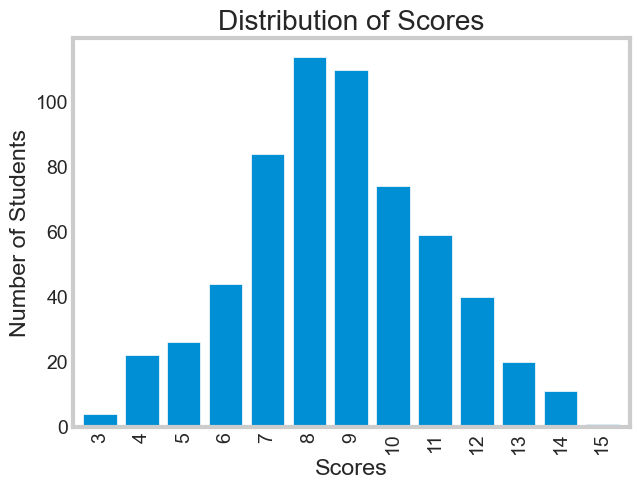

In [9]:
df['score'].value_counts() \
    .sort_index() \
    .plot(kind='bar',
          width=0.8)
plt.xlabel('Scores')
plt.ylabel('Number of Students')
plt.title('Distribution of Scores')
plt.grid(False)
plt.show()

In [10]:
def pass_or_fail(finalGrade):
    if finalGrade > 4:
        return 'Pass'
    else:
        return 'Fail'

df['pass_or_fail'] = df['finalGrade7_1'].apply(pass_or_fail)

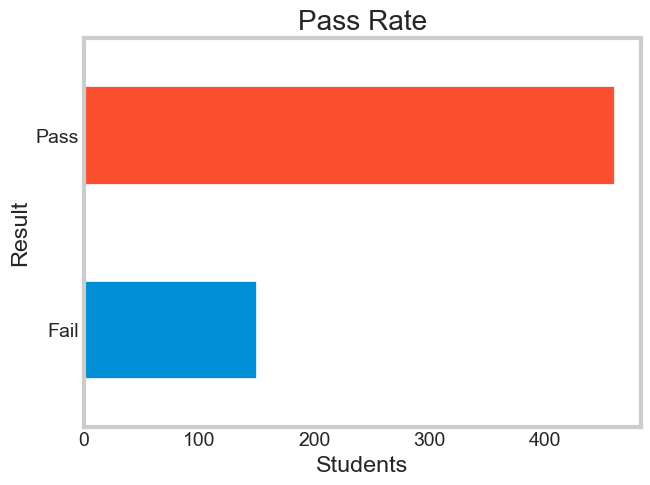

In [11]:
df['pass_or_fail'].value_counts().sort_values() \
    .plot(kind='barh',
          color=[color_pal[0], color_pal[1]],
          width=0.5)
plt.ylabel('Result')
plt.xlabel('Students')
plt.title('Pass Rate')
plt.grid(False)
plt.show()

In [12]:
questions = ['MCQ1', 'MCQ2', 'MCQ3', 'MCQ4', 'MCQ5', 'MCQ6', 'MCQ7','MCQ8', 'MCQ9', 'MCQ10', 'MCQ11', 'MCQ12', 'MCQ13', 'MCQ14', 'MCQ15','MCQ16']
def count_answers(df):
    my_list = []
    for q in questions:
        temp = df.groupby(q)['Stud_ID'] \
            .count() \
            .to_frame(name=q)
        my_list.append(temp)
    result = pd.concat(my_list, axis=1)
    return (result.fillna(0))

#### Here, we will group students into two groups (each one of 120 student):
 - Top, who get highest score
 - Bottom, who get lowest score

In [46]:
top_df = df.sort_values('score', ascending=False).head(120)
bottom_df = df.sort_values('score', ascending=True).head(120)
top_df = count_answers(top_df)
bottom_df = count_answers(bottom_df)

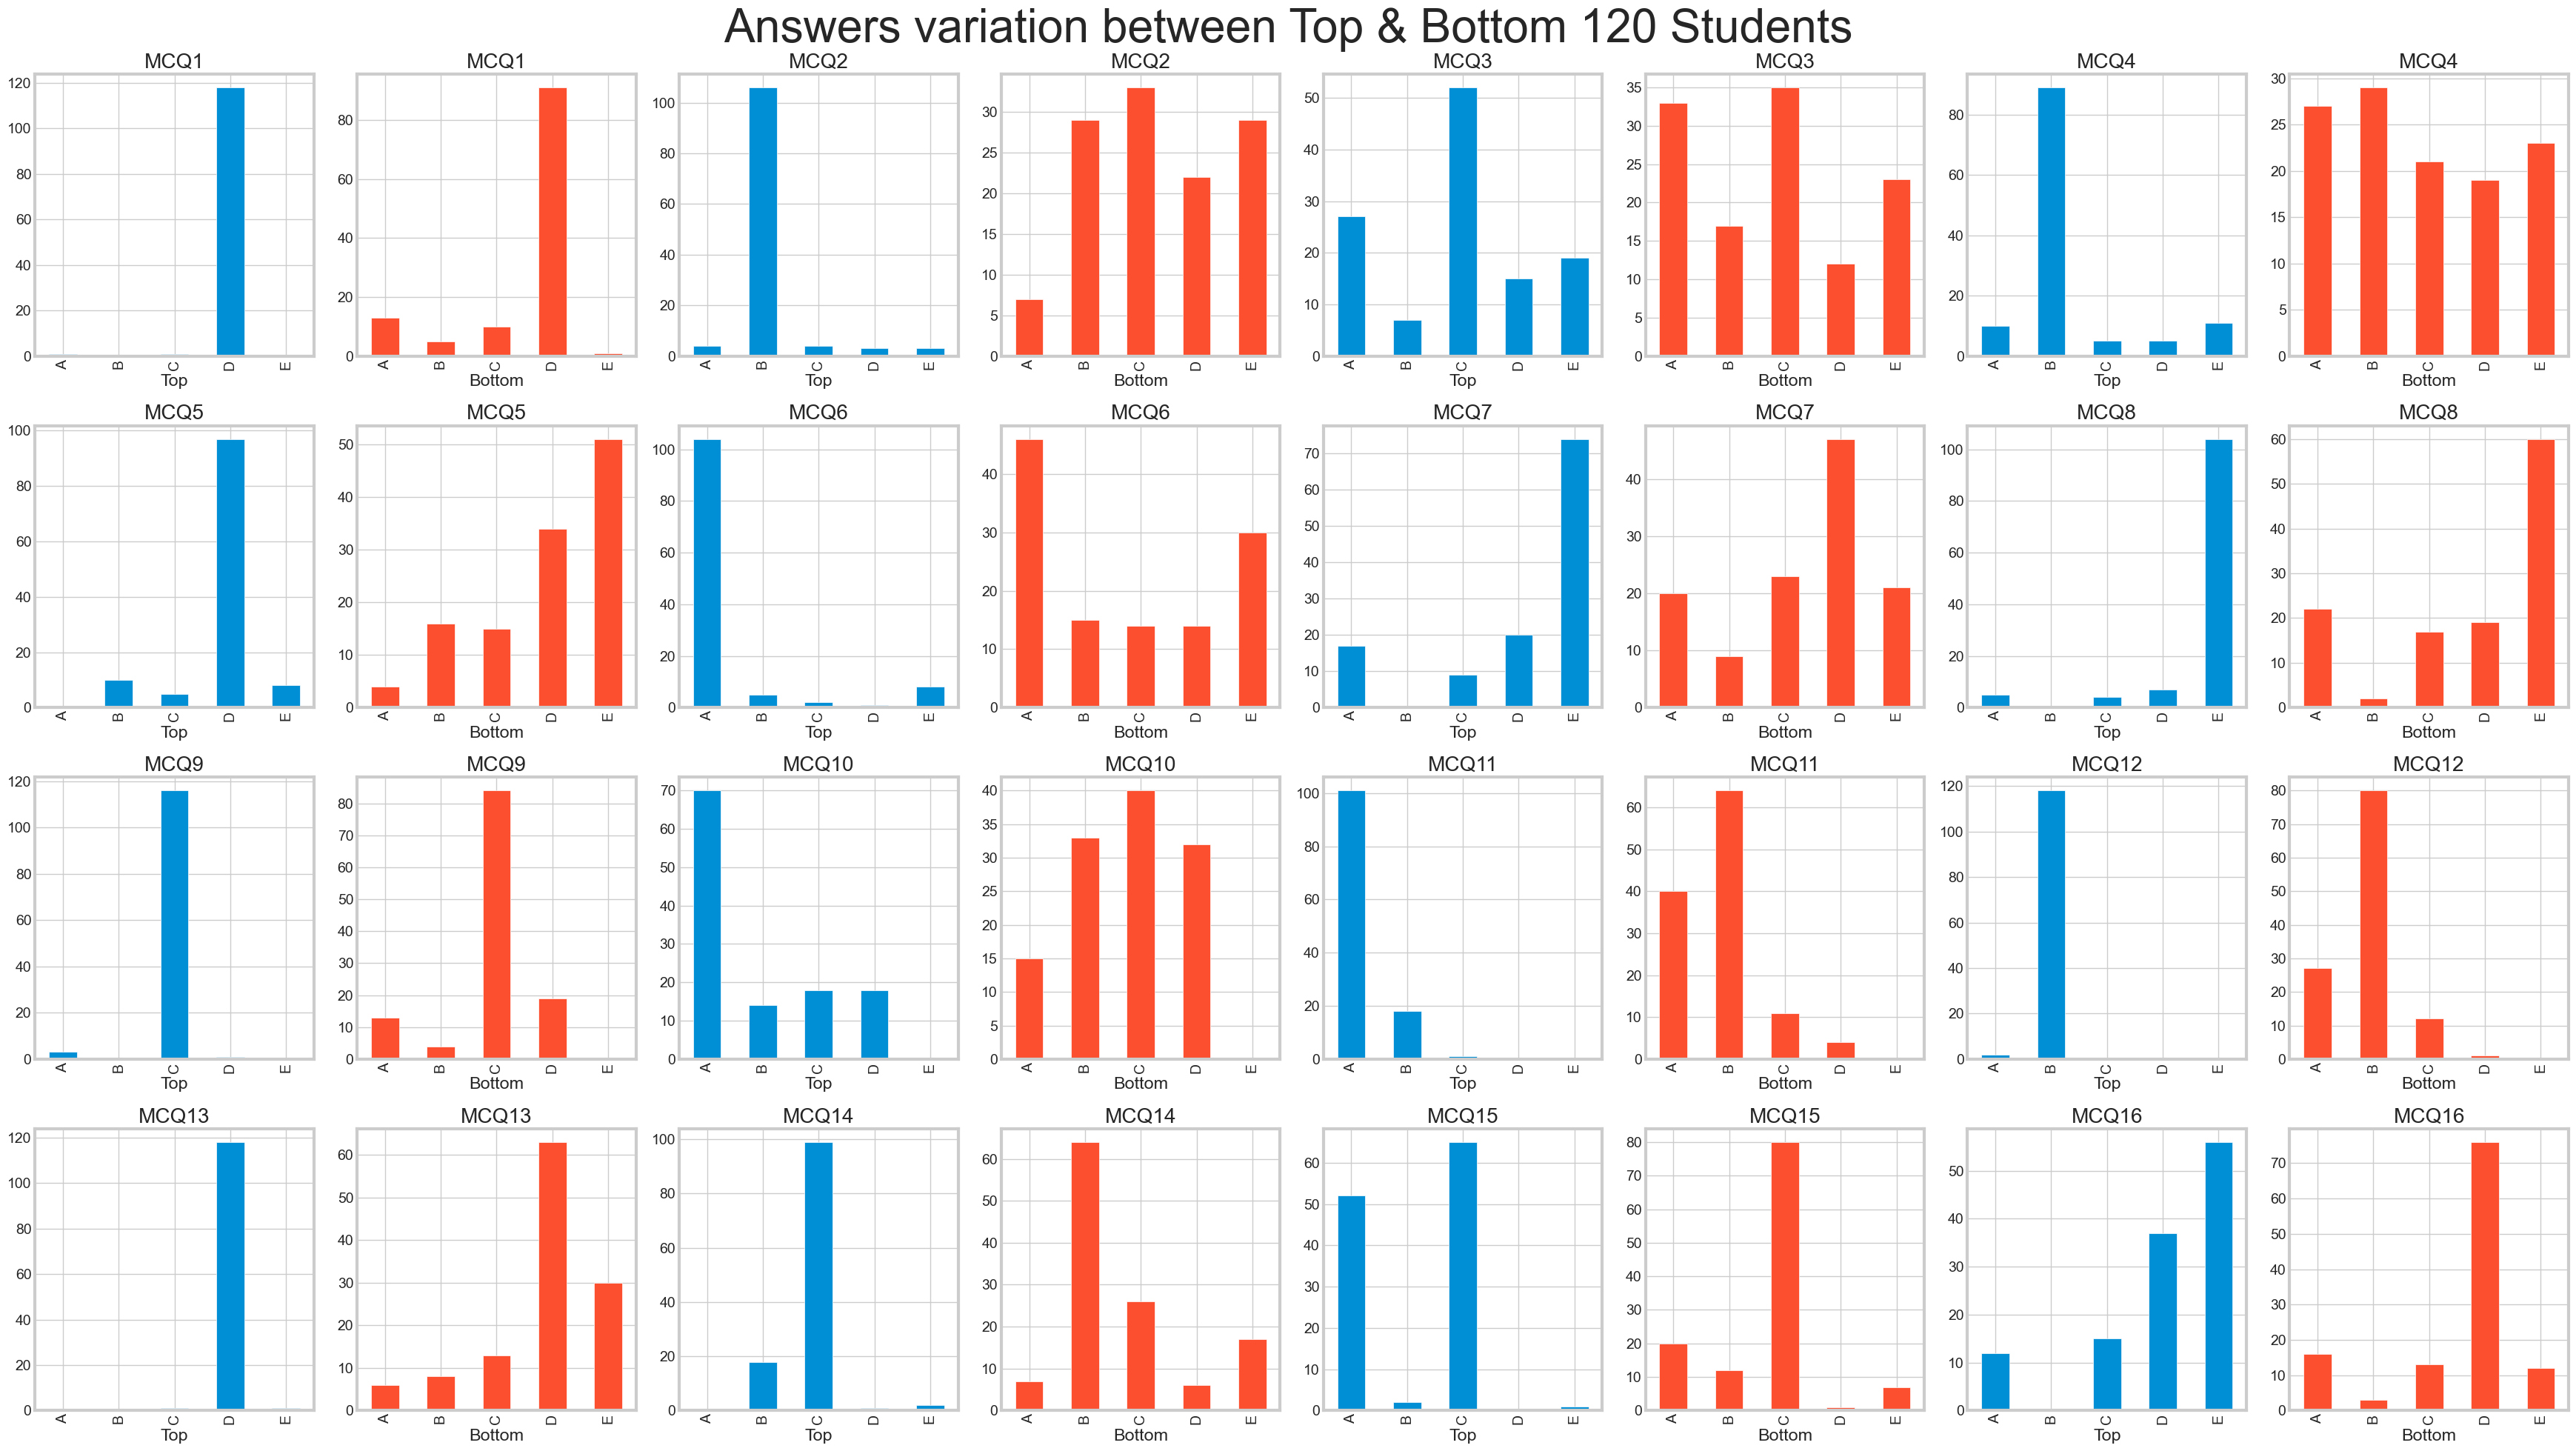

In [14]:
fig, axs = plt.subplots(4, 8, figsize=(35, 20))
axs = axs.flatten()
i = 0
j = 1
for q in questions:

    top_df[q].sort_index() \
        .plot(kind='bar',
              ax=axs[i],
              title=q,
              xlabel='Top')
    bottom_df[q].sort_index() \
        .plot(kind='bar',
              ax=axs[j],
              title=q,
              color=color_pal[1],
              xlabel='Bottom')
    i += 2
    j += 2
fig.suptitle('Answers variation between Top & Bottom 120 Students', fontsize=45)
plt.tight_layout()
plt.show()

In [54]:
top_df.style.background_gradient(cmap='Blues')

,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16
A,1.000000,4,27,10,0.000000,104,17.000000,5.000000,3.000000,70.000000,101.000000,2.000000,0.000000,0.000000,52.000000,12.000000
C,1.000000,4,52,5,5.000000,2,9.000000,4.000000,116.000000,18.000000,1.000000,0.000000,1.000000,99.000000,65.000000,15.000000
D,118.000000,3,15,5,97.000000,1,20.000000,7.000000,1.000000,18.000000,0.000000,0.000000,118.000000,1.000000,0.000000,37.000000
B,0.000000,106,7,89,10.000000,5,0.000000,0.000000,0.000000,14.000000,18.000000,118.000000,0.000000,18.000000,2.000000,0.000000
E,0.000000,3,19,11,8.000000,8,74.000000,104.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,56.000000


In [55]:
bottom_df.style.background_gradient(cmap='Reds')

,MCQ1,MCQ2,MCQ3,MCQ4,MCQ5,MCQ6,MCQ7,MCQ8,MCQ9,MCQ10,MCQ11,MCQ12,MCQ13,MCQ14,MCQ15,MCQ16
A,13,7,33,27,4,46,20,22,13.000000,15.000000,40.000000,27.000000,6,7,20,16
B,5,29,17,29,16,15,9,2,4.000000,33.000000,64.000000,80.000000,8,64,12,3
C,10,33,35,21,15,14,23,17,84.000000,40.000000,11.000000,12.000000,13,26,80,13
D,91,22,12,19,34,14,47,19,19.000000,32.000000,4.000000,1.000000,63,6,1,76
E,1,29,23,23,51,30,21,60,0.000000,0.000000,0.000000,0.000000,30,17,7,12
